<a href="https://colab.research.google.com/github/aravindkolli/demo-datascience/blob/main/ds_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
# Create a synthetic dataset with 4 classes
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=4, random_state=42)

# Convert the labels to a one-hot-encoded categorical format
y_categorical = to_categorical(y, num_classes=4)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.25, random_state=42)


In [ ]:
# Define a simple neural network model
model = Sequential([
    Dense(50, input_dim=20, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')  # The output layer with 4 neurons, one for each class
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)


In [ ]:
# Predict class probabilities for the test set
predictions = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)


8/8 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([1, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 1, 3, 3, 0, 3, 0, 1, 1, 3, 1,
       3, 0, 0, 3, 2, 1, 3, 0, 0, 1, 2, 0, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1,
       2, 2, 2, 2, 3, 3, 1, 1, 0, 1, 0, 0, 3, 1, 3, 3, 0, 1, 1, 3, 1, 3,
       0, 0, 3, 0, 1, 3, 1, 3, 3, 0, 3, 3, 2, 2, 3, 1, 0, 3, 3, 1, 2, 2,
       1, 3, 0, 0, 3, 2, 2, 1, 3, 3, 0, 0, 1, 2, 0, 3, 1, 3, 0, 3, 2, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 3, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2,
       0, 2, 3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 1, 3, 2, 0, 2, 3, 2, 2, 2, 0, 3, 2, 3, 1, 2, 2, 3, 1, 1, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 3, 0, 3, 3, 1, 1, 2, 2, 3, 1, 1, 0,
       0, 2, 0, 3, 0, 3, 0, 0, 2, 0, 0, 2, 0, 3, 0, 1, 0, 0, 0, 2, 2, 3,
       3, 0, 0, 3, 3, 0, 1, 2, 3, 3, 2, 0, 3, 1, 3, 2, 0, 3, 1, 2, 1, 0,
       1, 3, 3, 3, 2, 2, 0, 3])

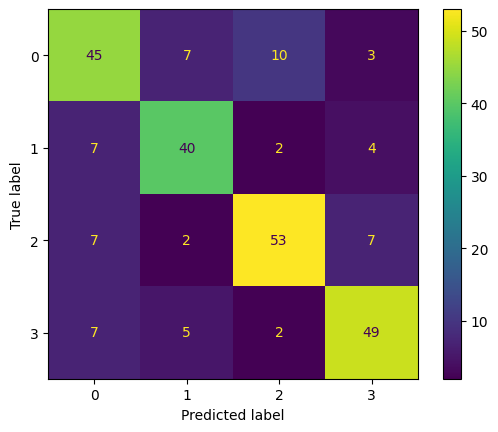

In [ ]:
# Plotting the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')

plt.show()
